# Life Expectancy Exploratory Data Analysis
In this project, I will be looking at a few selected health features to see how they vary across the states in the United States and to see if and how they may affect life expectancy.

First I will import all necessary libraries and my cleaned data file.  

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sb_utils import save_file

In [2]:
health_data = pd.read_csv('../data/health_data.csv')

In [3]:
health_data.head()

,State,County,Life Expectancy,Population,% Rural,Premature Deaths,% Smoking,% Obesity,% Physical Inactivy,% Excessive Drinking,% Uninsured,PCP Number,PCP Rate,MHP Number,MHP Rate,Preventable Hospital Rate,% Mammogram,% Flu Vaccine,% Unemployed,Median Household Income
0,Alabama,Autauga,77.162581,55869,22921,787.0,20,33,31,14,10.0,26.0,47.0,16.0,29.0,6650.0,39.0,42.0,"2,7",58233
1,Alabama,Baldwin,78.213405,223234,77060,3147.0,19,30,25,19,13.0,153.0,70.0,220.0,99.0,3471.0,43.0,46.0,"2,7",59871
2,Alabama,Barbour,74.054741,24686,18613,515.0,26,41,28,12,14.0,8.0,32.0,3.0,12.0,5314.0,44.0,39.0,"3,8",35972
3,Alabama,Bibb,73.408784,22394,15663,476.0,23,37,33,15,11.0,12.0,54.0,6.0,27.0,6690.0,33.0,40.0,"3,1",47918
4,Alabama,Blount,74.370874,57826,51562,1100.0,23,33,33,16,14.0,12.0,21.0,10.0,17.0,4440.0,37.0,40.0,"2,7",52902


In [4]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      2908 non-null   object 
 1   County                     2908 non-null   object 
 2   Life Expectancy            2908 non-null   float64
 3   Population                 2908 non-null   int64  
 4   % Rural                    2908 non-null   int64  
 5   Premature Deaths           2908 non-null   float64
 6   % Smoking                  2908 non-null   int64  
 7   % Obesity                  2908 non-null   int64  
 8   % Physical Inactivy        2908 non-null   int64  
 9   % Excessive Drinking       2908 non-null   int64  
 10  % Uninsured                2908 non-null   float64
 11  PCP Number                 2908 non-null   float64
 12  PCP Rate                   2908 non-null   float64
 13  MHP Number                 2908 non-null   float

In [5]:
health_data['Life Expectancy'].describe()

count    2908.000000
mean       77.510874
std         2.984904
min        67.093834
25%        75.559322
50%        77.541425
75%        79.411552
max       102.963081
Name: Life Expectancy, dtype: float64

In [6]:
health_data.set_index('County')['Life Expectancy'].sort_values(ascending=False)

County
San Miguel           102.963081
Mono                 101.598246
Summit                98.917222
Pitkin                94.404621
Liberty               91.185561
                        ...    
Martinsville City     67.932411
Roosevelt             67.667590
Petersburg City       67.446076
Todd                  67.423945
Covington City        67.093834
Name: Life Expectancy, Length: 2908, dtype: float64

In [9]:
health_data.set_index('State')['Life Expectancy'].sort_values(ascending=False)

State
Colorado        102.963081
California      101.598246
Colorado         98.917222
Colorado         94.404621
Montana          91.185561
                   ...    
Virginia         67.932411
Montana          67.667590
Virginia         67.446076
South Dakota     67.423945
Virginia         67.093834
Name: Life Expectancy, Length: 2908, dtype: float64

Just looking at the Life Expectancy column, I can see that there must be some outliers or incorrectly labeled data points. There are several points that are above 90, with two points going as high as 102 and 101. 
There could be other factors to consider, such as, this data is collected for the year 2021, which would be during the COVID pandemic. It would be very interesting to see how these point changed from pre-COVID, to during and post-COVID. 

In [7]:
means=health_data.groupby('State').mean()
means.head()

,Life Expectancy,Population,% Rural,Premature Deaths,% Smoking,% Obesity,% Physical Inactivy,% Excessive Drinking,% Uninsured,PCP Number,PCP Rate,MHP Number,MHP Rate,Preventable Hospital Rate,% Mammogram,% Flu Vaccine,Median Household Income
State,,,,,,,,,,,,,,,,,
Alabama,74.678920,75057.184615,29720.446154,1257.923077,22.815385,38.261538,31.892308,14.307692,12.569231,49.030769,45.446154,86.354974,69.855316,5869.446154,38.476923,40.276923,46263.107692
Alaska,77.167996,54460.727273,12014.181818,599.363636,23.545455,31.909091,21.363636,18.818182,16.181818,54.272727,115.181818,301.818182,826.545455,3198.636364,31.727273,30.545455,69102.090909
Arizona,78.572866,485247.800000,43423.866667,5442.533333,19.400000,30.733333,24.333333,18.800000,14.000000,313.866667,52.266667,679.533333,99.066667,3036.333333,35.000000,38.666667,51517.266667
Arkansas,74.982209,41124.589041,17278.219178,656.917808,25.109589,36.342466,33.808219,15.863014,9.767123,27.397260,45.821918,106.152693,157.358781,5225.452055,35.397260,43.013699,44045.972603
California,80.521254,693177.087719,32967.982456,6174.031186,14.912281,27.385965,21.105263,20.877193,7.877193,553.631579,70.000000,2587.508772,372.649123,3214.315789,37.122807,41.210526,71265.157895


In [8]:
means['Life Expectancy'].sort_values(ascending=False)

State
Hawaii                  82.006539
Colorado                81.307936
Rhode Island            80.539426
Connecticut             80.529189
California              80.521254
Massachusetts           80.449563
Minnesota               80.272548
North Dakota            80.126063
New Jersey              79.870225
Washington              79.855562
New York                79.647629
Vermont                 79.409915
Wyoming                 79.391151
Oregon                  79.327867
Wisconsin               79.309538
Nebraska                79.290184
New Hampshire           79.243433
Idaho                   79.215573
Utah                    79.160477
South Dakota            79.155214
Iowa                    79.125759
District of Columbia    79.019571
Montana                 78.982733
Arizona                 78.572866
Maryland                78.476832
Maine                   78.359024
Delaware                78.316579
Pennsylvania            78.283789
Michigan                78.121730
Florida 

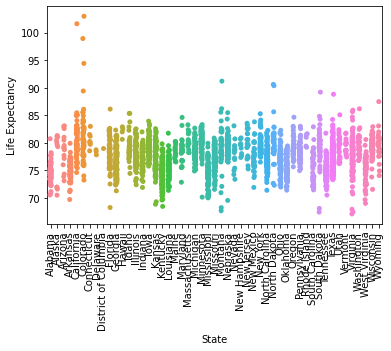

In [10]:
sns.stripplot(data=health_data,
            x='State',
            y='Life Expectancy')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.ylabel('Life Expectancy')
plt.show()

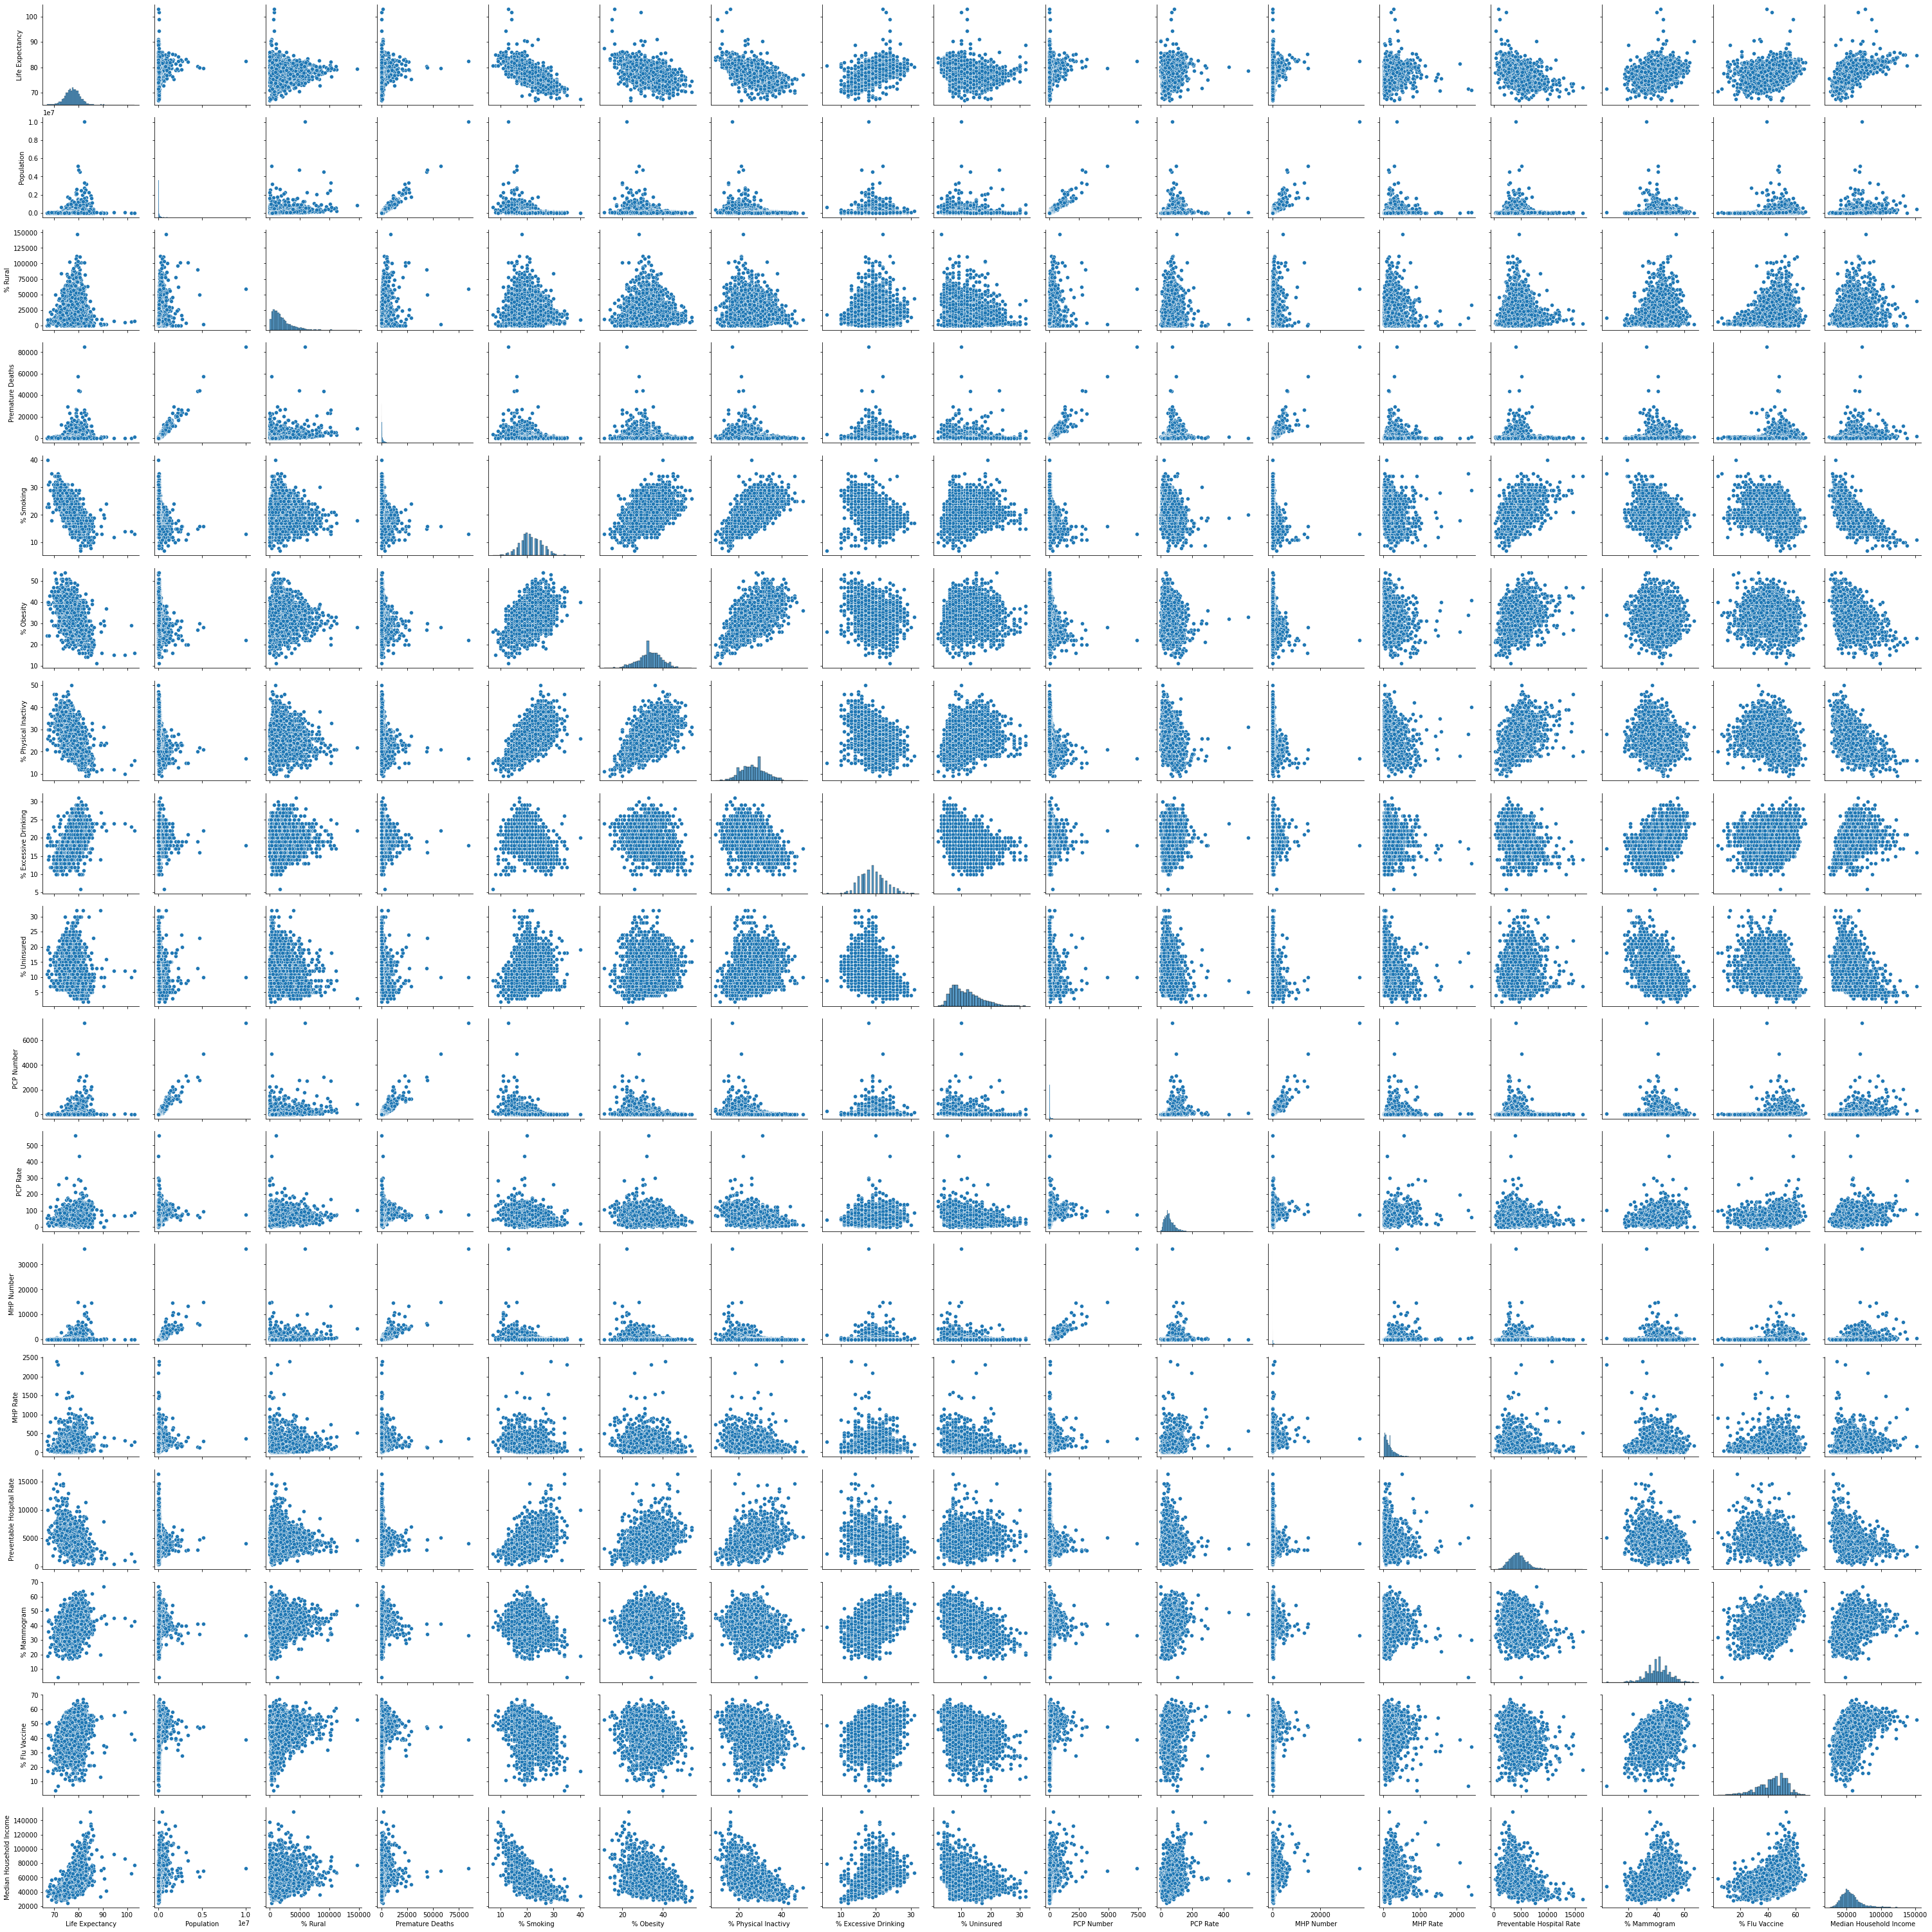

In [12]:
sns.pairplot(health_data)

Looks like PCP and MHP number and rates have some outliers 


<AxesSubplot:>

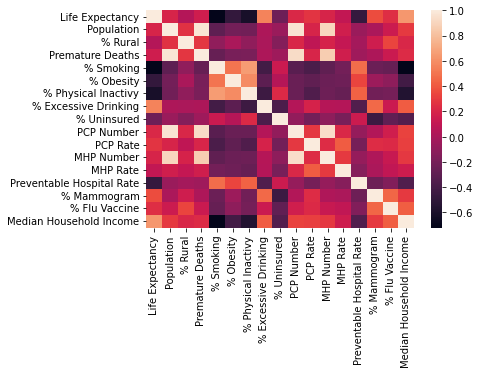

In [13]:
sns.heatmap(health_data.corr())

In [14]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Life Expectancy', data=health_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Life Expectancy')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [15]:
features = [f for f in health_data.columns if f not in ['State', 'County', 'Life Expectancy']]

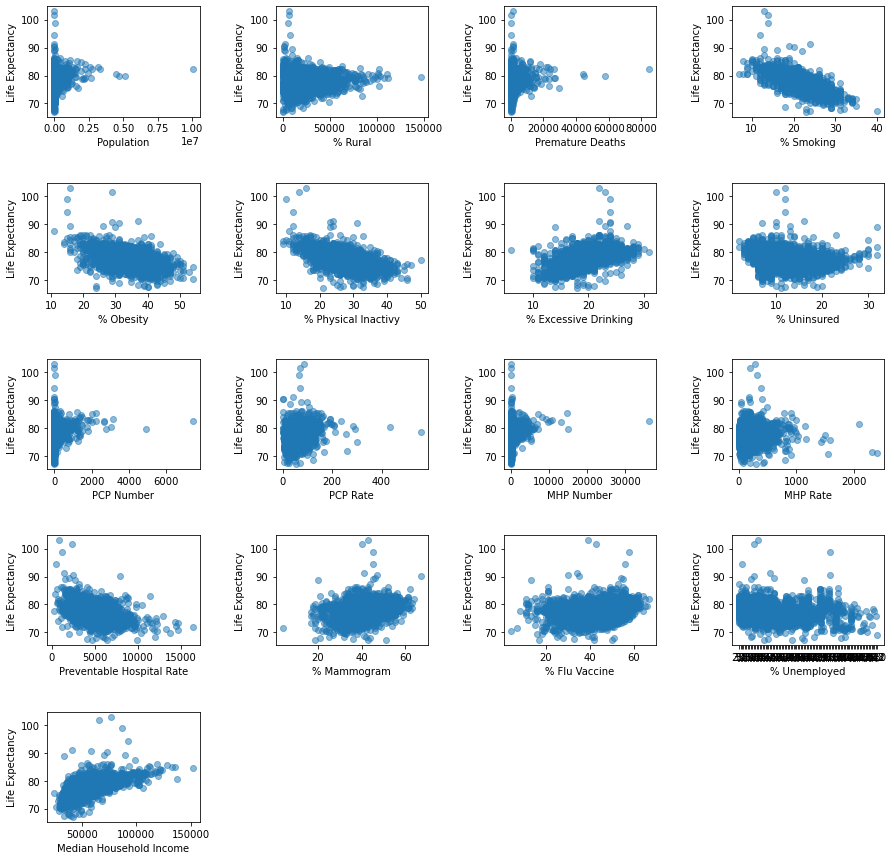

In [16]:
scatterplots(features, ncol=4, figsize=(15, 15))

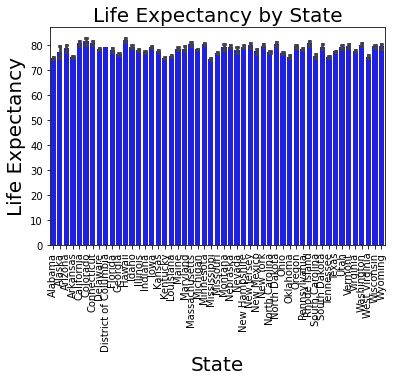

In [17]:
bar=sns.barplot(x=health_data['State'], y=health_data['Life Expectancy'], color='blue', capsize=.2)
plt.title('Life Expectancy by State', size=20)
plt.xlabel('State', size=20)
plt.ylabel('Life Expectancy', size=20)
plt.xticks(rotation='vertical')
plt.show()